In [48]:
import helpers
import numpy as np
import re 
import networkx as nx

#helpers.npNicePrint(arr)

data = """x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj"""

with open("input_24.txt", 'r') as f:
    data = f.read().rstrip()

gates, wires = data.split("\n\n")
G = nx.DiGraph()

gates = {gate.split(": ")[0]: int(gate.split(": ")[1]) for gate in gates.split("\n")}
G.add_nodes_from(gates.keys())
print(gates)
#print(colors, designs)

# Regex pattern
pattern = r"^(.*)\s+(AND|OR|XOR)\s+(.*)\s+->\s+(.*)$"

operations = {}

# Parse each line
for line in wires.splitlines():
    match = re.match(pattern, line)
    if match:
        var1, operator, var2, result = match.groups()
        if result in operations.keys():
            print("duplicate keys")
        operations[result] = (var1, operator, var2)
        G.add_edge(var1, result)
        G.add_edge(var2, result)
        #print(f"var1: {var1}, operator: {operator}, var2: {var2}, result: {result}")
    else:
        print(f"No match for line: {line}")


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]

#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]

#data = [(int(row.split(",")[0]),int(row.split(",")[1])) for row in data.split("\n")]

#grid, moves = data.split("\n\n")
#moves = moves.replace("\n", "")

#grid = {(x,y): str(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid
#data = [str(x).split("-") for x in data.split("\n")]
#data

# Output the parsed data
#print(data)


#grid = {(x,y): "." for x in range(max_coor+1) for y in range(max_coor+1)}

#helpers.visualize_dict_grid(grid) 

{'x00': 1, 'x01': 1, 'x02': 1, 'x03': 1, 'x04': 0, 'x05': 1, 'x06': 0, 'x07': 1, 'x08': 0, 'x09': 1, 'x10': 1, 'x11': 1, 'x12': 1, 'x13': 0, 'x14': 1, 'x15': 0, 'x16': 0, 'x17': 1, 'x18': 0, 'x19': 1, 'x20': 0, 'x21': 0, 'x22': 0, 'x23': 1, 'x24': 0, 'x25': 0, 'x26': 1, 'x27': 1, 'x28': 0, 'x29': 0, 'x30': 1, 'x31': 1, 'x32': 1, 'x33': 1, 'x34': 1, 'x35': 0, 'x36': 1, 'x37': 0, 'x38': 1, 'x39': 1, 'x40': 0, 'x41': 0, 'x42': 0, 'x43': 0, 'x44': 1, 'y00': 1, 'y01': 1, 'y02': 1, 'y03': 1, 'y04': 1, 'y05': 0, 'y06': 0, 'y07': 0, 'y08': 0, 'y09': 0, 'y10': 1, 'y11': 0, 'y12': 0, 'y13': 0, 'y14': 1, 'y15': 1, 'y16': 0, 'y17': 1, 'y18': 0, 'y19': 1, 'y20': 0, 'y21': 0, 'y22': 0, 'y23': 0, 'y24': 1, 'y25': 1, 'y26': 0, 'y27': 1, 'y28': 0, 'y29': 1, 'y30': 1, 'y31': 1, 'y32': 1, 'y33': 0, 'y34': 1, 'y35': 1, 'y36': 1, 'y37': 1, 'y38': 0, 'y39': 1, 'y40': 0, 'y41': 0, 'y42': 1, 'y43': 0, 'y44': 1}


The graph is a DAG!


<IPython.core.display.Javascript object>


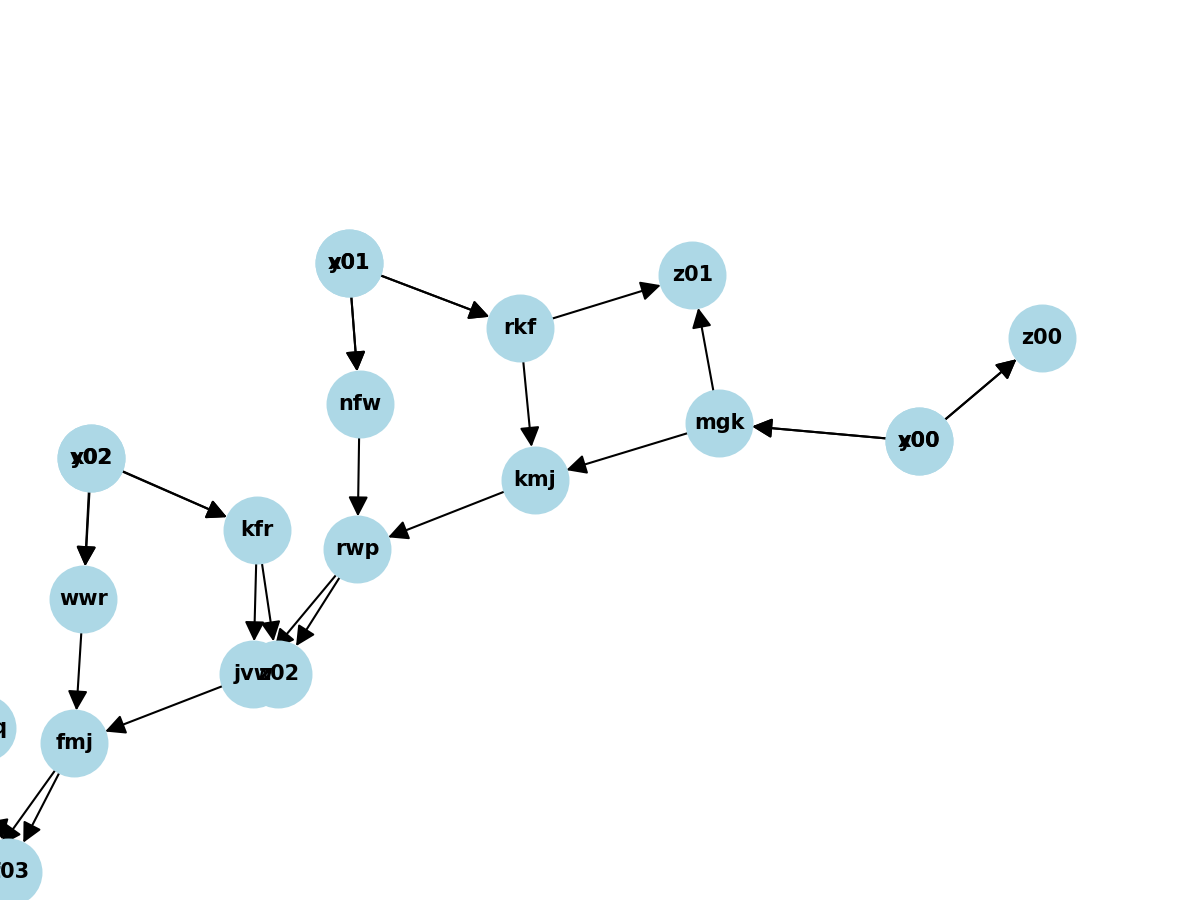

In [50]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Ensure it's a DAG
if nx.is_directed_acyclic_graph(G):
    print("The graph is a DAG!")

# Plot the DAG
plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(G)  # Compute positions for nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Directed Acyclic Graph (DAG)", fontsize=14)
plt.show()

In [51]:
if not nx.is_directed_acyclic_graph(G):
    print("Graph is not a DAG")
    
# Perform topological sort
for node in list(nx.topological_sort(G)):
    if node in operations:
        op1, operation, op2 = operations[node]
        if operation == "AND":
            gates[node] = gates[op1] & gates[op2]
        elif operation == "OR":
            gates[node] = gates[op1] | gates[op2]
        elif operation == "XOR":
            gates[node] = gates[op1] ^ gates[op2]
        else:
            print("error no operation found")
            
# Extract keys starting with 'z' and sort them by their numeric suffix
z_keys = sorted((key for key in gates if key.startswith('z')), reverse=True)

# Construct the binary string
binary_string = ''.join(str(gates[key]) for key in z_keys)

# Convert the binary string to a decimal integer
decimal_value = int(binary_string, 2)

print(f"Binary value: {binary_string}")
print(f"Decimal value: {decimal_value}")


Binary value: 1001011001010110111000000110001110001011001110
Decimal value: 41324968993486
